# DVI1: Similarité à la base de la couleur
## - Auteur : Ahmed Samady
## - Module: Multimedia Mining and Indexing
## - Professeur : Pr. M. AIT KBIR

### Importation des librairies

In [217]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import json
import os

In [ ]:
dossier1 = "C:/Users/ah-ma/Desktop/Samashi/Studying/Master/S3/Multimedia Mining And Indexing/Part 1 - Traitement d'Image/Labs/DVI1/dossier1/"
dossier2 = "C:/Users/ah-ma/Desktop/Samashi/Studying/Master/S3/Multimedia Mining And Indexing/Part 1 - Traitement d'Image/Labs/DVI1/dossier2/"
json_dir = "C:/Users/ah-ma/Desktop/Samashi/Studying/Master/S3/Multimedia Mining And Indexing/Part 1 - Traitement d'Image/Labs/DVI1/"

### 2. Calculer les couleurs dominantes d'une images en prenant en compte les couleurs avec 95% de présence.

In [219]:
for img in os.listdir(dossier1):
    image = cv2.imread(dossier1+img)
    # conversion en espace de couleur Lab
    image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    pix = image.reshape(-1, 3)
    # faire un clustering des couleurs avec un nombre de clusters = 16
    kmeans = KMeans(n_clusters=16)
    kmeans.fit(pix)
    
    counts = {label: 0 for label in range(16)}
    for label in kmeans.labels_:
        counts[label] += 1
        
    # calculer le nombre total de pixels
    total_pix = sum(counts.values())
    
    # trier les couleurs par nombre de pixels
    sortedCols = sorted(
        [(kmeans.cluster_centers_[i], count / total_pix) for i, count in counts.items()], 
        key=lambda x: x[1], reverse=True)
    
    domColors = [color for color, _ in sortedCols[:16]]
    # convertir les float en int
    domColors = [list(map(int, color)) for color in domColors]
    
    # sauvegarder les couleurs dominantes dans un dictionnaire pour chaque image
    domColors_dict = {img: domColors}

    # sauvegarder les couleurs dominantes dans un fichier json
    if os.path.exists(json_dir + 'DVI1_col.json'):
        with open(json_dir + 'DVI1_col.json', 'r') as file:
            data = json.load(file)
    else:
        data = {}

    data.update(domColors_dict)

    print(json.dumps(data, indent=2))
    # sauvegarder le fichier json
    with open(json_dir + 'DVI1_col.json', 'w') as file:
        json.dump(data, file, indent=2, separators=(',', ': '))


{
  "1472.jpg": [
    [
      239,
      129,
      135
    ],
    [
      212,
      111,
      106
    ],
    [
      197,
      112,
      98
    ],
    [
      233,
      118,
      117
    ],
    [
      217,
      132,
      136
    ],
    [
      16,
      129,
      124
    ],
    [
      139,
      134,
      135
    ],
    [
      42,
      132,
      126
    ],
    [
      193,
      131,
      134
    ],
    [
      97,
      133,
      128
    ],
    [
      117,
      132,
      152
    ],
    [
      120,
      131,
      122
    ],
    [
      69,
      131,
      123
    ],
    [
      166,
      132,
      136
    ],
    [
      84,
      129,
      151
    ],
    [
      156,
      127,
      115
    ]
  ],
  "1479.jpg": [
    [
      75,
      128,
      116
    ],
    [
      60,
      128,
      114
    ],
    [
      89,
      128,
      119
    ],
    [
      175,
      125,
      126
    ],
    [
      44,
      128,
      112
    ],
    [
      29,
      131,


### 3. Proposer une ou plusieurs distances pour mesurer la similarité entre les images par rapport la couleur pour chaque caractéristique.

In [220]:
# Fonctions de calcul du distance euclidienne entre deux couleurs
def euclidean_distance(c1, c2):
    return np.linalg.norm(np.array(c1) - np.array(c2))

# Fonctions de calcul du distance bhatta entre deux couleurs
def bhatta_distance(c1, c2):
    h1 = np.histogram(c1, bins=256, range=(0, 256))[0]
    h2 = np.histogram(c2, bins=256, range=(0, 256))[0]
    h1 = h1 / np.sum(h1)
    h2 = h2 / np.sum(h2)
    return np.sqrt(1 - np.sum(np.sqrt(h1 * h2)))

# Fonctions de calcul d'histogramme d'une image
def calcHistogrammes(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist

# Fonctions de comparaison d'histogrammes de deux images en utilisant l'intesection des deux histogrammes
def compareHistogrammes(hist1, hist2):
    intersection = cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)
    return intersection

### 4. Faire une comparaison des résultats de la similarité en utilisant chaque distance séparément puis la distance global

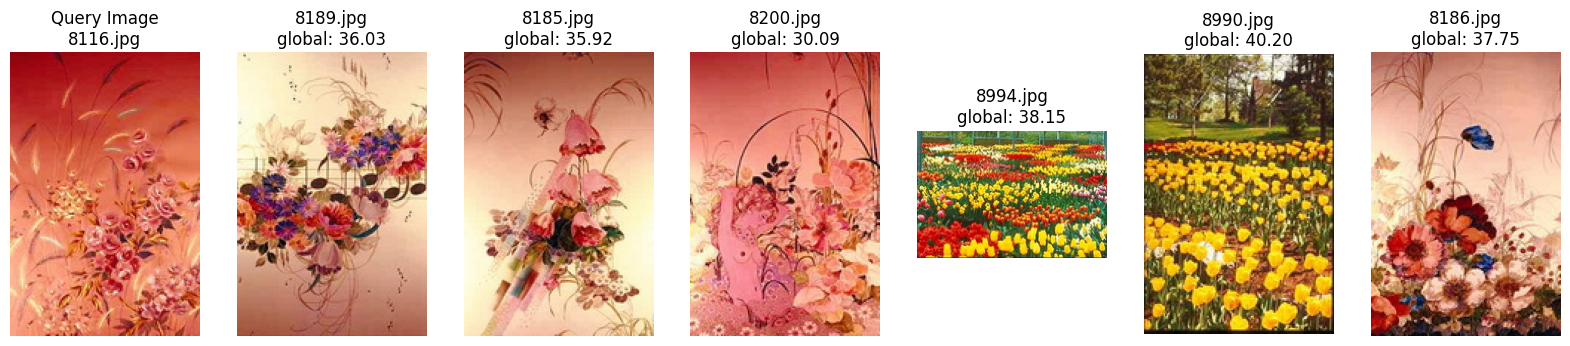

In [221]:
# prendre 16 images du dossier 1
imgDoss1 = os.listdir(dossier1)
# prendre 4 images du dossier 2
imgDoss2 = os.listdir(dossier2)

# dict des distances entre les images
res = {}

# boucler sur les images de test
img = imgDoss2[np.random.randint(0, 4)]
res[img] = {}

image = cv2.imread(dossier2+img)
# conversion en espace de couleur Lab
image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
pix = image.reshape(-1, 3)
# faire un clustering des couleurs avec un nombre de clusters = 16
kmeans = KMeans(n_clusters=16)
kmeans.fit(pix)

counts = {label: 0 for label in range(16)}
for label in kmeans.labels_:
    counts[label] += 1
    
# calculer le nombre total de pixels
total_pix = sum(counts.values())

# trier les couleurs par nombre de pixels
sortedCols = sorted(
    [(kmeans.cluster_centers_[i], count / total_pix) for i, count in counts.items()], 
    key=lambda x: x[1], reverse=True)

domColors = [color for color, _ in sortedCols[:16]]
# convertir les float en int
domColors = [list(map(int, color)) for color in domColors]

dominant_colors = domColors

# boucler sur les autres images sans prendre en compte les image de test
for other_img, other_colors in data.items():
    
    # lists des différents distances entre les couleurs dominantes de l'image de test et les autres images
    euclidean_distances = []
    bhatta_distances = []
    global_distances = []
    
    # calculer les distances entre les couleurs dominantes de l'image de test et les autres images
    for c1 in dominant_colors:
        for c2 in other_colors:
            euclidean_dist = euclidean_distance(c1, c2)
            bhatta_dist = bhatta_distance(c1, c2)
            global_dist = (euclidean_dist + bhatta_dist) / 2
            
            euclidean_distances.append(euclidean_dist)
            bhatta_distances.append(bhatta_dist)
            global_distances.append(global_dist)
    
    # prendre la moyenne des distances
    avg_euc_distance = np.mean(euclidean_distances)
    avg_bhatta_distance = np.mean(bhatta_distances)
    avg_global_distance = np.mean(global_distances)
    
    # sauvegarder les distances dans un dictionnaire
    res[img][other_img] = {
        'euclidean': avg_euc_distance,
        'bhatta': avg_bhatta_distance,
        'global': avg_global_distance
    }

# trier les distances par ordre croissant selon la distance globale
sortedRes = {}
for img, comparisons in res.items():
    sorted_comparisons = dict(sorted(comparisons.items(), key=lambda item: item[1]['bhatta']))
    sortedRes[img] = sorted_comparisons

# Plot the chosen image and the 6 most similar images
plt.figure(figsize=(20, 10))
plt.subplot(1, 7, 1)
plt.imshow(cv2.cvtColor(cv2.imread(dossier2 + img), cv2.COLOR_BGR2RGB))
plt.title(f"Query Image\n{img}")
plt.axis('off')

# Plot the 6 most similar images
for i, (other_img, distances) in enumerate(list(sortedRes[img].items())[:6], start=2):
    plt.subplot(1, 7, i)
    plt.imshow(cv2.cvtColor(cv2.imread(dossier1 + other_img), cv2.COLOR_BGR2RGB))
    plt.title(f"{other_img}\nglobal: {distances['global']:.2f}")
    plt.axis('off')

plt.show()

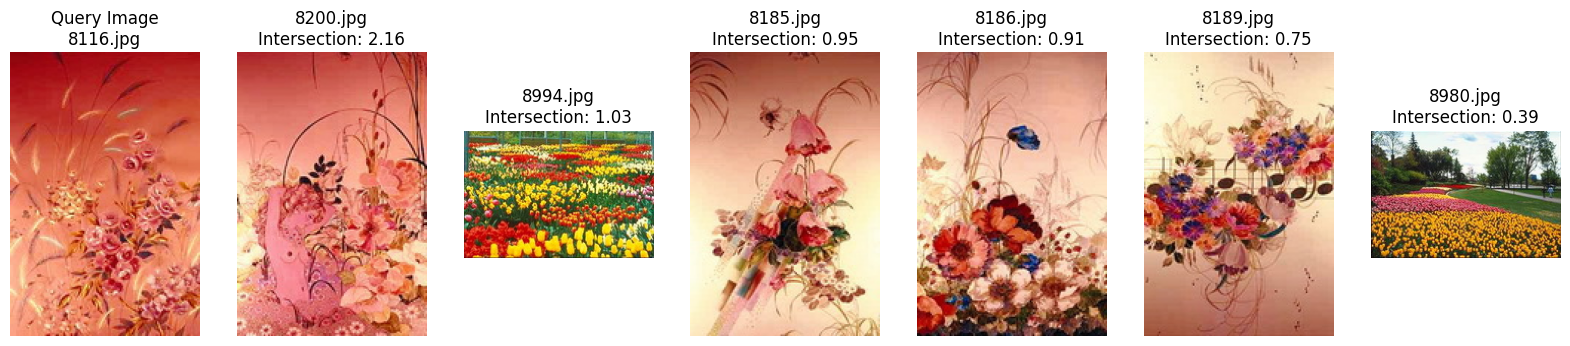

In [222]:
res = {}

res[img] = {}
image = cv2.imread(dossier2 + img)
# calculer l'histogramme de l'image de test
hist1 = calcHistogrammes(image)

for other_img_name in os.listdir(dossier1):
    
    # calculer l'histogramme de l'autre image
    other_image = cv2.imread(dossier1 + other_img_name)
    hist2 = calcHistogrammes(other_image)
    
    # comparer les deux histogrammes
    intersection = compareHistogrammes(hist1, hist2)
    
    # sauvegarder les distances dans un dictionnaire
    res[img][other_img_name] = {
        'intersection': intersection
    }

# trier les distances par ordre croissant selon la distance chi2
sortedRes = {}
for img, comparisons in res.items():
    sorted_comparisons = dict(sorted(comparisons.items(), key=lambda item: item[1]['intersection'], reverse=True))
    sortedRes[img] = sorted_comparisons

plt.figure(figsize=(20, 10))
plt.subplot(1, 7, 1)
plt.imshow(cv2.cvtColor(cv2.imread(dossier2 + img), cv2.COLOR_BGR2RGB))
plt.title(f"Query Image\n{img}")
plt.axis('off')

# Plot the 6 most similar images
for i, (other_img, distances) in enumerate(list(sortedRes[img].items())[:6], start=2):
    plt.subplot(1, 7, i)
    plt.imshow(cv2.cvtColor(cv2.imread(dossier1 + other_img), cv2.COLOR_BGR2RGB))
    plt.title(f"{other_img}\nIntersection: {distances['intersection']:.2f}")
    plt.axis('off')

plt.show()